In [172]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

In [173]:
class MLP(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(MLP,self).__init__()
    self.fc1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.fc2=nn.Linear(hidden_size,output_size)
    self.softmax=nn.Softmax(dim=1)


  def forward(self,x):
    x=self.fc1(x)
    x=self.relu(x)
    x=self.fc2(x)
    x = self.softmax(x)
    return x

In [174]:
class CustomDataset(Dataset):
    def __init__(self, transform=None):
        self.image_paths = ['/content/Q5_1.png', '/content/Q5_2.png', '/content/Q5_3.png']
        self.labels = [0, 1, 2]

        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        label = self.labels[index]

        image = Image.open(image_path).convert('L')

        label_onehot = torch.zeros(3)
        label_onehot[label] = 1

        if self.transform is not None:
            image = self.transform(image)

        return image,label_onehot

In [175]:
# hyperparameter
input_size = 100
inputimg=10
hidden_size = 64
output_size = 3

learning_rate = 0.001
num_epochs = 4000
batch_size = 1

In [176]:
transform = transforms.Compose([
    transforms.Resize((inputimg, inputimg)),
    transforms.ToTensor(),
])
dataset = CustomDataset(transform=transform)

In [177]:
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [178]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

for epoch in range(num_epochs):
  running_loss = 0.0
  for images, labels in dataset:
    images = images.view(-1, input_size)
    optimizer.zero_grad()
    outputs = model(images)
    outputs  = torch.squeeze(outputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  epoch_loss = running_loss / len(dataset)
  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}")


Epoch 1/4000, Loss: 1.104584534962972
Epoch 2/4000, Loss: 1.1044858694076538
Epoch 3/4000, Loss: 1.1044129530588787
Epoch 4/4000, Loss: 1.1043293873469036
Epoch 5/4000, Loss: 1.1042479674021404
Epoch 6/4000, Loss: 1.1041665474573772
Epoch 7/4000, Loss: 1.104085127512614
Epoch 8/4000, Loss: 1.1040168205897014
Epoch 9/4000, Loss: 1.1039289236068726
Epoch 10/4000, Loss: 1.1038475036621094
Epoch 11/4000, Loss: 1.1037660439809163
Epoch 12/4000, Loss: 1.10369606812795
Epoch 13/4000, Loss: 1.1036099990208943
Epoch 14/4000, Loss: 1.103528618812561
Epoch 15/4000, Loss: 1.1034472386042278
Epoch 16/4000, Loss: 1.1033800840377808
Epoch 17/4000, Loss: 1.1033018827438354
Epoch 18/4000, Loss: 1.1032267014185588
Epoch 19/4000, Loss: 1.1031514803568523
Epoch 20/4000, Loss: 1.1030847628911336
Epoch 21/4000, Loss: 1.1030079921086628
Epoch 22/4000, Loss: 1.1029271682103474
Epoch 23/4000, Loss: 1.102854569753011
Epoch 24/4000, Loss: 1.1027893622716267
Epoch 25/4000, Loss: 1.1027168035507202
Epoch 26/4000, 

In [179]:
torch.save(model.state_dict(), 'model_weights.pth')

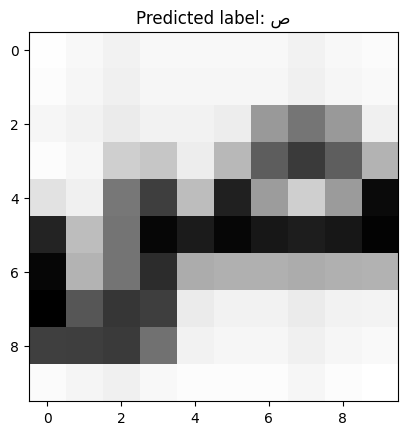

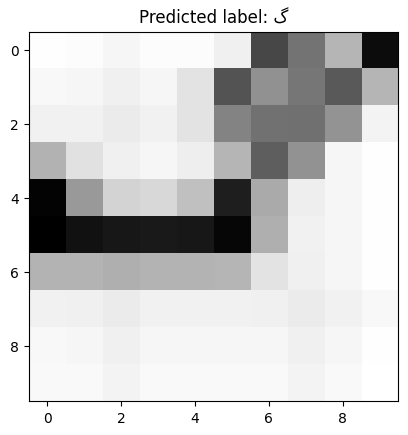

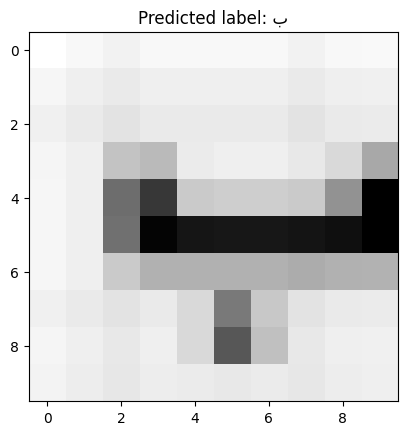

In [193]:
dataset2 = CustomDataset(transform=transform)
mdict = {0:'ص',1:'گ',2:'ب'}
for im, label in dataset2:
    img = np.transpose(im.numpy(), (1, 2, 0))
    plt.imshow(img, cmap='gray')
    im = im.view(-1, input_size)
    o1 = model(im)
    predicted_label = torch.argmax(o1).item()
    plt.title("Predicted label: " + str(mdict[predicted_label]))
    plt.show()